# Before You Start
###(Can skip is GPU is not required)

Let's make sure that we have access to GPU. We can use nvidia-smi command to do that. In case of any problems navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save.

In [ ]:
!nvidia-smi

Thu Feb  8 06:43:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0              27W /  70W |    781MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/datasets


# Install Yolo

In [ ]:
# Pip install method

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=bd9b2c63c7a27523c472a27b22faa5fb8c60bf5e11f8878f4cb2fe8286302906
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


# Model Training
###(Not required here as trained models with results have been provided)





We have trained 2 custom models for our ADAS system.
1. vehicles_pedestrians.pt -> Trained on coco dataset[1], has 80 classes, out of which we'll use 6 classes viz. Person, car, bicycle, motorcycle, bus and truck

2. traffic_signs.pt -> Custom Model trained on a Traffic Sign Dataset[2].


**Step 1: Go to Dataset Repository**

Go to the link mentioned in reference 2


**Step 2: Exporting dataset**

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Download Dataset` and select the `YOLO v8` dataset format. Select on `Show download code` and click on `Continue`. Copy and paste the code snippet below to load the dataset with you API key.


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 49.1/49.1 MB 171.6 MB/s eta 0:00:01
ERROR: Operation cancelled by user


ModuleNotFoundError: No module named 'roboflow'

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

# Visualize Results

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id_1 = '1a4ybmfukw6YS7wLB5Uqdk9WIRXReOZXt'

download1 = drive.CreateFile({'id': file_id_1})

# Download the file to a local disc
download1.GetContentFile('Results.zip')

In [ ]:
import zipfile
import os

# Path to your zip file
zip_file_path = "/content/Results.zip"

# Directory to extract the contents to
extracted_dir_path = "/content/Results"

# Create a directory to extract the contents into
os.makedirs(extracted_dir_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print("Extraction complete.")

Extraction complete.


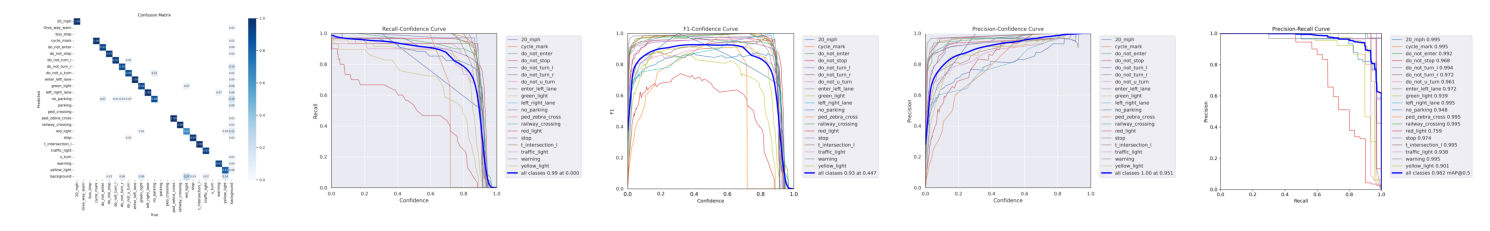

In [ ]:
import matplotlib.pyplot as plt
import os

# Path to the directory containing images
images_dir = "/content/Results/Results/Road_Sign_Results"

# Get a list of image files in the directory
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Create a subplot for each image
num_images = len(image_files)
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Loop through each image file and display it
for i, image_file in enumerate(image_files):
    image_path = os.path.join(images_dir, image_file)
    img = plt.imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

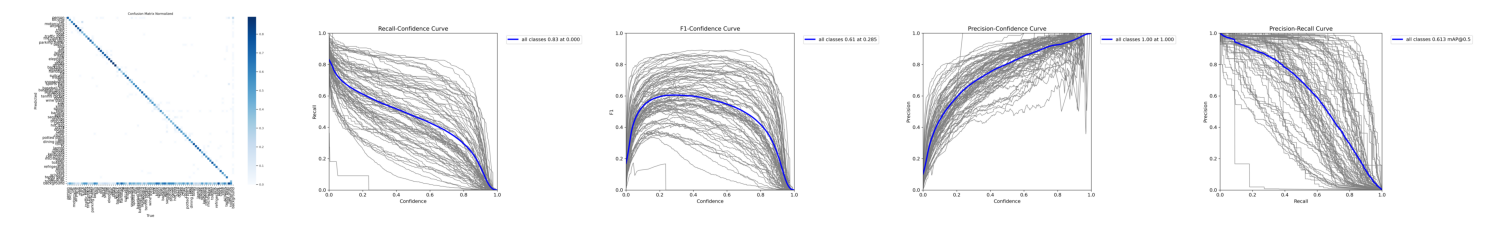

In [ ]:
import matplotlib.pyplot as plt
import os

# Path to the directory containing images
images_dir = "/content/Results/Results/Coco_Results"

# Get a list of image files in the directory
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Create a subplot for each image
num_images = len(image_files)
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Loop through each image file and display it
for i, image_file in enumerate(image_files):
    image_path = os.path.join(images_dir, image_file)
    img = plt.imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Load Custom Models


In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Note: You need to provide access to a google drive to load below files.
After running the below code snippet, sign-in with google and provide access to Google drive by selecting all check boxes.  

[Click `Allow`. Then Choose any appropriate Google Account. Click on  `Continue`. Then `Select All` options and press on `Continue`.]

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id_1 = '1rBWtA-dZtFWePPFKPK5HdQTet4cdboko'
file_id_2 = '17KN5hx5mEl6DaVv_FvLWuNKWjnkjB3k7'

download1 = drive.CreateFile({'id': file_id_1})
download2 = drive.CreateFile({'id': file_id_2})

# Download the file to a local disc
download1.GetContentFile('Pedestrians-Vehicles.pt')
download2.GetContentFile('Traffic_Signs.pt')

# Image inference

In [ ]:
from google.colab import files

# Upload a file from your local machine
uploaded = files.upload()

print("Upload Files for Inference using Pedestrians-Vehicles Model")
# Filter only JPG and PNG files
valid_extensions = ('.jpg', '.jpeg', '.png')
filtered_uploaded = {image_input_A: content for image_input_A, content in uploaded.items() if image_input_A.lower().endswith(valid_extensions)}

if not filtered_uploaded:
    print("No valid JPG or PNG files uploaded.")
else:
    # Print the uploaded file information
    for image_input_A, content in filtered_uploaded.items():
        print(f'Uploaded file: {image_input_A}, size: {len(content)} bytes')



Saving woman-crossing.jpg to woman-crossing.jpg
Upload Files for Inference using Pedestrians-Vehicles Model
Uploaded file: woman-crossing.jpg, size: 219183 bytes



image 1/1 /content/datasets/woman-crossing.jpg: 448x640 1 person, 5 cars, 95.4ms
Speed: 3.4ms preprocess, 95.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


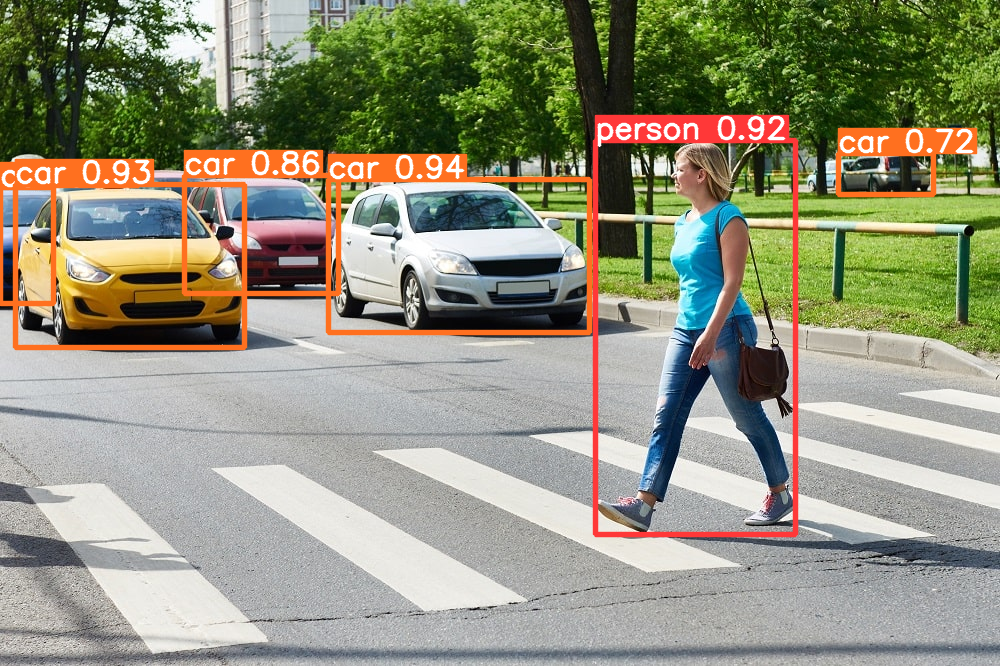

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load a pretrained YOLOv8n model
modelA = YOLO('Pedestrians-Vehicles.pt')

# Run inference on 'bus.jpg'
resultsA = modelA(image_input_A,classes=[0,1,2,3,5,6,7],conf=0.5)  # Assuming you have defined 'image_input'

# Show the results
for r in resultsA:
    im_array = r.plot()  # plot a BGR numpy array of predictions

    # Show image using OpenCV
    cv2_imshow(im_array)

    # Save image using OpenCV
    cv2.imwrite('image_results_pedestrians_vehicles.jpg', im_array)


In [ ]:
from google.colab import files

# Upload a file from your local machine
uploaded = files.upload()

print("Upload Files for Inference using Traffic Signs Model")
# Filter only JPG and PNG files
valid_extensions = ('.jpg', '.jpeg', '.png')
filtered_uploaded = {image_input_B: content for image_input_B, content in uploaded.items() if image_input_B.lower().endswith(valid_extensions)}

if not filtered_uploaded:
    print("No valid JPG or PNG files uploaded.")
else:
    # Print the uploaded file information
    for image_input_B, content in filtered_uploaded.items():
        print(f'Uploaded file: {image_input_B}, size: {len(content)} bytes')

Saving 250px-Green_Ore_-_Geograph_-_102718.jpg to 250px-Green_Ore_-_Geograph_-_102718.jpg
Upload Files for Inference using Traffic Signs Model
Uploaded file: 250px-Green_Ore_-_Geograph_-_102718.jpg, size: 12643 bytes


WARNING ⚠️ Traffic_Signs.pt appears to require 'omegaconf', which is not in ultralytics requirements.
AutoInstall will run now for 'omegaconf' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['omegaconf'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=cc2fb004080b70a7dc3ed7894c8e62de530dea40a1c6356f54eab0084ceedc61
  Stored in directory: /tmp/pip-ephem-wheel-cache-e3baumj9/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4

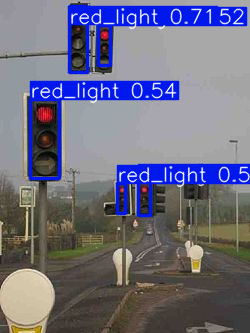

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load a pretrained YOLOv8n model
modelB = YOLO('Traffic_Signs.pt')

# Run inference on 'input'
resultsB = modelB(image_input_B,conf=0.3)  # Assuming you have defined 'image_input'

# Show the results
for r in resultsB:
    im_array = r.plot()  # plot a BGR numpy array of predictions

    # Show image using OpenCV
    cv2_imshow(im_array)

    # Save image using OpenCV
    cv2.imwrite('image_results_traffic_signs.jpg', im_array)


# Video Inference

In [ ]:
from google.colab import files

# Upload a file from your local machine
uploaded = files.upload()

print("Upload Video Files for Inference")
# Filter only video files (e.g., .mp4, .avi)
valid_extensions = ('.mp4', '.avi', '.mkv', '.mov')
filtered_uploaded = {video_input: content for video_input, content in uploaded.items() if video_input.lower().endswith(valid_extensions)}

if not filtered_uploaded:
    print("No valid video files uploaded.")
else:
    # Print the uploaded file information
    for video_input, content in filtered_uploaded.items():
        print(f'Uploaded file: {video_input}, size: {len(content)} bytes')


Saving input_video_1.mp4 to input_video_1.mp4
Upload Video Files for Inference
Uploaded file: input_video_1.mp4, size: 2641803 bytes


In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load pretrained YOLOv8n models
modelA = YOLO('Pedestrians-Vehicles.pt')
modelB = YOLO('Traffic_Signs.pt')

# Open video capture
cap = cv2.VideoCapture(video_input)

# Get video details
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create video writer for saving the output
output_path = 'output_video_combined_1.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process each frame in the video
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Run inference on the frame using Model A
    resultsA = modelA(frame, classes=[0,1,2,3,5,6,7], conf=0.5)

    # Run inference on the frame using Model B
    resultsB = modelB(frame, conf=0.3)

    # Display and save results from Model A
    for r in resultsA:
        im_array_A = r.plot()  # plot a BGR numpy array of predictions
        #cv2_imshow(im_array_A)
        out.write(im_array_A)

    # Display and save results from Model B
    for r in resultsB:
        im_array_B = r.plot()  # plot a BGR numpy array of predictions
        #cv2_imshow(im_array_B)
        #out.write(im_array_B) # Uncomment Below line to apply inference on road Markkings

# Release video capture and writer
cap.release()
out.release()

cv2.destroyAllWindows()



0: 384x640 1 car, 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.5ms
Speed: 2.3ms preprocess, 11.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 11.5ms
Speed: 2.7ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.7ms
Speed: 3.0ms preprocess, 10.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 12.8ms
Speed: 2.5ms preprocess, 12.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.7ms
Speed: 2.7ms preprocess, 10.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 10.9ms
Speed: 2.6ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.7ms
Speed: 3.3ms preprocess, 10.7ms inference, 0.6ms postprocess per image a

# Road Lane Detection

(Direct Video Application)

First Upload the video using below code snippet.

In [ ]:
from google.colab import files

# Upload a file from your local machine
uploaded = files.upload()

print("Upload Video Files for Inference")
# Filter only video files (e.g., .mp4, .avi)
valid_extensions = ('.mp4', '.avi', '.mkv', '.mov')
filtered_uploaded = {video_input_lane: content for video_input_lane, content in uploaded.items() if video_input_lane.lower().endswith(valid_extensions)}

if not filtered_uploaded:
    print("No valid video files uploaded.")
else:
    # Print the uploaded file information
    for video_input_lane, content in filtered_uploaded.items():
        print(f'Uploaded file: {video_input_lane}, size: {len(content)} bytes')

Saving input_video_1.mp4 to input_video_1 (1).mp4
Upload Video Files for Inference
Uploaded file: input_video_1 (1).mp4, size: 2641803 bytes


In [ ]:
import cv2
import numpy as np

# FUNCTION DEFINITIONS
# Use HSV for thresholding - NOT REQUIRED
def convert_hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
def HSV_color_selection(image):
    #Convert the input image to HSV
    converted_image = convert_hsv(image)

    #White color mask
    lower_threshold = np.uint8([0, 0, 210])
    upper_threshold = np.uint8([255, 30, 255])
    white_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)

    #Yellow color mask
    lower_threshold = np.uint8([22, 93, 0])
    upper_threshold = np.uint8([45, 255, 255])
    yellow_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)

    #Combine white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_image = cv2.bitwise_and(image, image, mask = mask)

    return masked_image

# CANNY EDGE DETECTION - STEP 1 - Converting to grayscale
def gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# CANNY EDGE DETECTION - STEP 2 - Gaussian Smoothing
def gaussian_smoothing(image, kernel_size = 3):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def canny_detector(image, low_threshold = 50, high_threshold = 150):
    return cv2.Canny(image, low_threshold, high_threshold)


def region_selection(image):
    mask = np.zeros_like(image)
    #Defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    #We could have used fixed numbers as the vertices of the polygon,
    #but they will not be applicable to images with different dimesnions.
    rows, cols = image.shape[:2]
    bottom_left  = [cols * 0.1, rows * 0.95]
    top_left     = [cols * 0.4, rows * 0.6]
    bottom_right = [cols * 0.9, rows * 0.95]
    top_right    = [cols * 0.6, rows * 0.6]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

# Hough Transform to join edges
def hough_transform(image):
    rho = 1              #Distance resolution of the accumulator in pixels.
    theta = np.pi/180    #Angle resolution of the accumulator in radians.
    threshold = 20       #Only lines that are greater than threshold will be returned.
    minLineLength = 20   #Line segments shorter than that are rejected.
    maxLineGap = 300     #Maximum allowed gap between points on the same line to link them
    return cv2.HoughLinesP(image, rho = rho, theta = theta, threshold = threshold,
                           minLineLength = minLineLength, maxLineGap = maxLineGap)

# Draw raw lines (optional step)
def draw_lines(image, lines, color = [255, 0, 0], thickness = 2):
    image = np.copy(image)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image, (x1, y1), (x2, y2), color, thickness)
    return image

# Find lane lines using slope intercept form
def average_slope_intercept(lines):
    left_lines    = [] #(slope, intercept)
    left_weights  = [] #(length,)
    right_lines   = [] #(slope, intercept)
    right_weights = [] #(length,)

    for line in lines:
        for x1, y1, x2, y2 in line:
            if x1 == x2:
                continue
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - (slope * x1)
            length = np.sqrt(((y2 - y1) ** 2) + ((x2 - x1) ** 2))
            if slope < 0:
                left_lines.append((slope, intercept))
                left_weights.append((length))
            else:
                right_lines.append((slope, intercept))
                right_weights.append((length))
    left_lane  = np.dot(left_weights,  left_lines) / np.sum(left_weights)  if len(left_weights) > 0 else None
    right_lane = np.dot(right_weights, right_lines) / np.sum(right_weights) if len(right_weights) > 0 else None
    return left_lane, right_lane

# Get pixel point coordinates from slope intercept form
def pixel_points(y1, y2, line):
    if line is None:
        return None
    slope, intercept = line

    # Check for vertical lines (infinite slope)
    if slope != 0:
        x1 = int((y1 - intercept) / slope)
        x2 = int((y2 - intercept) / slope)
    else:
        x1 = x2 = int((y1 + y2) / 2)  # Set x1 and x2 to the middle point

    y1 = int(y1)
    y2 = int(y2)
    return ((x1, y1), (x2, y2))

# Create full lenght lines from pixel points
def lane_lines(image, lines):
    left_lane, right_lane = average_slope_intercept(lines)
    y1 = image.shape[0]
    y2 = y1 * 0.6
    left_line  = pixel_points(y1, y2, left_lane)
    right_line = pixel_points(y1, y2, right_lane)
    return left_line, right_line

# Draw Lines and Fill Area between Lines on Image
def draw_and_fill_lane_area(image, lines, color=[200, 200, 10], thickness=12, fill_color=[0, 100, 0]):
    if lines is None or len(lines) < 2:
        return image

    line_image = np.zeros_like(image)
    for line in lines:
        if line is not None:
            cv2.line(line_image, *line, color, thickness)

    valid_lines = [line for line in lines if line is not None]

    if len(valid_lines) < 2:
        return image
    # Create a polygon to fill the area between the lines
    polygon = np.array([lines[0][0], lines[0][1], lines[-1][1], lines[-1][0]])
    cv2.fillPoly(line_image, [polygon], fill_color)

    return cv2.addWeighted(image, 1.0, line_image, 1.0, 0.0)

def main_algorithm(image):
    # Conver to HSV and apply threshold - NOT REQUIRED
    #yellow_white_select = HSV_color_selection(image)

    # Canny step 1 - convert to grayscale
    gray_image = gray_scale(image)

    # Canny step 2 - Gaussian Smoothing
    blur_image = gaussian_smoothing(gray_image)

    # Canny step 3 - Canny detector
    edge_detected_image = canny_detector(blur_image)

    # Cut ROI
    masked_image = region_selection(edge_detected_image)

    # Hough Transform - Get hough lines
    hough_line = hough_transform(masked_image)

    # Draw Hough Lines on Image for visulaization (NOT REQUIRED)
    #resultant_image = draw_lines(image, hough_line)

    # Find lane lines, Convert slope-intercept to pixel points, Highlight region
    final_result = draw_and_fill_lane_area(image, lane_lines(image, hough_line))

    return final_result

In [ ]:
import cv2
import numpy as np

# Open video capture
cap = cv2.VideoCapture(video_input)

# Get video details
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create video writer for saving the output
output_path = 'output_video_lane_detection.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

if (cap.isOpened()== False):
    print("Error opening video file")

while(cap.isOpened()):

    ret, frame = cap.read()

    if not ret:
        print('Done')
        break

    final_result = main_algorithm(frame)

    out.write(final_result)

    if ret == True:
        continue
        #cv2.imshow('Frame', final_result) # Will not work in colab but works in a local python environment

        # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    else:
        break


cap.release()

out.release()

cv2.destroyAllWindows()

print("Video Processing Completed!")

Done
Video Processing Completed!


# Integrated Code


In [ ]:
from google.colab import files

# Upload a file from your local machine
uploaded = files.upload()

print("Upload Video Files for Inference")
# Filter only video files (e.g., .mp4, .avi)
valid_extensions = ('.mp4', '.avi', '.mkv', '.mov')
filtered_uploaded = {video_input_integrated: content for video_input_integrated, content in uploaded.items() if video_input_integrated.lower().endswith(valid_extensions)}

if not filtered_uploaded:
    print("No valid video files uploaded.")
else:
    # Print the uploaded file information
    for video_input_integrated, content in filtered_uploaded.items():
        print(f'Uploaded file: {video_input_integrated}, size: {len(content)} bytes')

Saving Demo.mp4 to Demo (1).mp4
Upload Video Files for Inference
Uploaded file: Demo (1).mp4, size: 15177210 bytes


In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import numpy as np

# To run on your local machine use the variable 'video_input_integrated' to specify the video path
# Example:
# video_input_integrated = 'C:\Users\OneDrive\input_video'

# SET FLAG AS 'False' to turn-off lane detection
LANE_DETECTION_FLAG = True

# Load pretrained YOLOv8n models
modelA = YOLO('Pedestrians-Vehicles.pt')
modelB = YOLO('Traffic_Signs.pt')

# Open video capture
cap = cv2.VideoCapture(video_input_integrated)

# Get video details
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create video writer for saving the output
output_path = 'output_video_integrated_combined.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# FUNCTION DEFINITIONS
# Use HSV for thresholding - NOT REQUIRED
def convert_hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
def HSV_color_selection(image):
    #Convert the input image to HSV
    converted_image = convert_hsv(image)

    #White color mask
    lower_threshold = np.uint8([0, 0, 210])
    upper_threshold = np.uint8([255, 30, 255])
    white_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)

    #Yellow color mask
    lower_threshold = np.uint8([22, 93, 0])
    upper_threshold = np.uint8([45, 255, 255])
    yellow_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)

    #Combine white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_image = cv2.bitwise_and(image, image, mask = mask)

    return masked_image

# CANNY EDGE DETECTION - STEP 1 - Converting to grayscale
def gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# CANNY EDGE DETECTION - STEP 2 - Gaussian Smoothing
def gaussian_smoothing(image, kernel_size = 3):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def canny_detector(image, low_threshold = 50, high_threshold = 150):
    return cv2.Canny(image, low_threshold, high_threshold)


def region_selection(image):
    mask = np.zeros_like(image)
    #Defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    #We could have used fixed numbers as the vertices of the polygon,
    #but they will not be applicable to images with different dimesnions.
    rows, cols = image.shape[:2]
    bottom_left  = [cols * 0.1, rows * 0.95]
    top_left     = [cols * 0.4, rows * 0.6]
    bottom_right = [cols * 0.9, rows * 0.95]
    top_right    = [cols * 0.6, rows * 0.6]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

# Hough Transform to join edges
def hough_transform(image):
    rho = 1              #Distance resolution of the accumulator in pixels.
    theta = np.pi/180    #Angle resolution of the accumulator in radians.
    threshold = 20       #Only lines that are greater than threshold will be returned.
    minLineLength = 20   #Line segments shorter than that are rejected.
    maxLineGap = 300     #Maximum allowed gap between points on the same line to link them
    return cv2.HoughLinesP(image, rho = rho, theta = theta, threshold = threshold,
                           minLineLength = minLineLength, maxLineGap = maxLineGap)

# Draw raw lines (optional step)
def draw_lines(image, lines, color = [255, 0, 0], thickness = 2):
    image = np.copy(image)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image, (x1, y1), (x2, y2), color, thickness)
    return image

# Find lane lines using slope intercept form
def average_slope_intercept(lines):
    left_lines    = [] #(slope, intercept)
    left_weights  = [] #(length,)
    right_lines   = [] #(slope, intercept)
    right_weights = [] #(length,)

    for line in lines:
        for x1, y1, x2, y2 in line:
            if x1 == x2:
                continue
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - (slope * x1)
            length = np.sqrt(((y2 - y1) ** 2) + ((x2 - x1) ** 2))
            if slope < 0:
                left_lines.append((slope, intercept))
                left_weights.append((length))
            else:
                right_lines.append((slope, intercept))
                right_weights.append((length))
    left_lane  = np.dot(left_weights,  left_lines) / np.sum(left_weights)  if len(left_weights) > 0 else None
    right_lane = np.dot(right_weights, right_lines) / np.sum(right_weights) if len(right_weights) > 0 else None
    return left_lane, right_lane

# Get pixel point coordinates from slope intercept form
def pixel_points(y1, y2, line):
    if line is None:
        return None
    slope, intercept = line

    # Check for vertical lines (infinite slope)
    if slope != 0:
        x1 = int((y1 - intercept) / slope)
        x2 = int((y2 - intercept) / slope)
    else:
        x1 = x2 = int((y1 + y2) / 2)  # Set x1 and x2 to the middle point

    y1 = int(y1)
    y2 = int(y2)
    return ((x1, y1), (x2, y2))

# Create full lenght lines from pixel points
def lane_lines(image, lines):
    left_lane, right_lane = average_slope_intercept(lines)
    y1 = image.shape[0]
    y2 = y1 * 0.6
    left_line  = pixel_points(y1, y2, left_lane)
    right_line = pixel_points(y1, y2, right_lane)
    return left_line, right_line

# Draw Lines and Fill Area between Lines on Image
def draw_and_fill_lane_area(image, lines, color=[200, 200, 10], thickness=12, fill_color=[0, 100, 0]):
    if lines is None or len(lines) < 2:
        return image

    line_image = np.zeros_like(image)
    for line in lines:
        if line is not None:
            cv2.line(line_image, *line, color, thickness)

    valid_lines = [line for line in lines if line is not None]

    if len(valid_lines) < 2:
        return image
    # Create a polygon to fill the area between the lines
    polygon = np.array([lines[0][0], lines[0][1], lines[-1][1], lines[-1][0]])
    cv2.fillPoly(line_image, [polygon], fill_color)

    return cv2.addWeighted(image, 1.0, line_image, 1.0, 0.0)

def main_algorithm(image):
    # Conver to HSV and apply threshold - NOT REQUIRED
    #yellow_white_select = HSV_color_selection(image)

    # Canny step 1 - convert to grayscale
    gray_image = gray_scale(image)

    # Canny step 2 - Gaussian Smoothing
    blur_image = gaussian_smoothing(gray_image)

    # Canny step 3 - Canny detector
    edge_detected_image = canny_detector(blur_image)

    # Cut ROI
    masked_image = region_selection(edge_detected_image)

    # Hough Transform - Get hough lines
    hough_line = hough_transform(masked_image)

    # Draw Hough Lines on Image for visulaization (NOT REQUIRED)
    #resultant_image = draw_lines(image, hough_line)

    # Find lane lines, Convert slope-intercept to pixel points, Highlight region
    final_result = draw_and_fill_lane_area(image, lane_lines(image, hough_line))

    return final_result

# Process each frame in the video
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Run inference on the frame using Model A
    resultsA = modelA(frame, classes=[0,1,2,3,5,6,7], conf=0.5)

    # Run inference on the frame using Model B
    resultsB = modelB(frame, conf=0.3)

    # Display and save results from Model A
    for r in resultsA:
        im_array_A = r.plot()  # plot a BGR numpy array of predictions
        #cv2_imshow(im_array_A)
        #out.write(im_array_A)

    # Run inference on the frame using Model B
    resultsB = modelB(im_array_A, conf=0.3)

    # Display and save results from Model B
    for r in resultsB:
        im_array_B = r.plot()  # plot a BGR numpy array of predictions
        #cv2_imshow(im_array_B)
        #out.write(im_array_A) # Uncomment Below line to apply inference on road Markkings
    if LANE_DETECTION_FLAG:
      final_result = main_algorithm(im_array_B)
      out.write(final_result)
    else:
      out.write(im_array_B)
# Release video capture and writer
cap.release()
out.release()

cv2.destroyAllWindows()


0: 384x640 3 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 red_lights, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 red_light, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 red_lights, 10.7ms
Speed: 2.3ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 red_light, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 red_lights, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at sha

# Download Results

To download the ouput files goto Files -> Press on the three dots adjacent to the required file and click on `Download`.

Or Alternatively run the code below with required file path.

In [ ]:
# Download the processed video/Images
import os
import zipfile
from google.colab import files

# Create some sample files (replace this with your actual file paths)
file_paths = ['/content/output_video_integrated_combined.avi','/content/output_video_combined.avi', '/content/image_results_traffic_signs.jpg', '/content/image_results_pedestrians_vehicles.jpg','/content/output_video_lane_detection.avi']

# Zip the files
zip_file_path = '/content/files.zip'
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for file_path in file_paths:
        zipf.write(file_path, os.path.basename(file_path))

# Download the zip file
files.download(zip_file_path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/output_video_integrated_combined.avi'

# Real-time use case demonstration

In [ ]:
from google.colab import files

# Upload a file from your local machine
uploaded = files.upload()

print("Upload Video Files for Inference")
# Filter only video files (e.g., .mp4, .avi)
valid_extensions = ('.mp4', '.avi', '.mkv', '.mov')
filtered_uploaded = {DEMO: content for DEMO, content in uploaded.items() if DEMO.lower().endswith(valid_extensions)}

if not filtered_uploaded:
    print("No valid video files uploaded.")
else:
    # Print the uploaded file information
    for DEMO, content in filtered_uploaded.items():
        print(f'Uploaded file: {DEMO}, size: {len(content)} bytes')

Saving Demo.mp4 to Demo.mp4
Upload Video Files for Inference
Uploaded file: Demo.mp4, size: 15177210 bytes


In [ ]:
# DRAW BOUNDING BOXES
import cv2
from ultralytics import YOLO
import numpy as np

# Load pretrained YOLOv8n models
modelA = YOLO('Pedestrians-Vehicles.pt')
modelB = YOLO('Traffic_Signs.pt')

# Open video capture
cap = cv2.VideoCapture(DEMO)

# Get video details
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create video writer for saving the output as MP4
output_path = 'DEMO_OUTPUT_BB.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Change fourcc to mp4v for MP4 format
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process each frame in the video
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Create a copy of the frame
    frame_A = frame.copy()
    frame_B = frame.copy()

    # Run inference on the frame using Model A
    resultsA = modelA(frame, classes=[0,1,2,3,5,6,7], conf=0.5,verbose=False)


    # Run inference on the frame using Model B
    resultsB = modelB.predict(frame_B, conf=0.3,verbose=False)

    # Extract bounding boxes from Model A and draw them on the frame
    for result in resultsA:
        boxes = result.boxes.xyxy
        for box, conf, cls in zip(boxes, result.boxes.conf, result.boxes.cls):
            b = box.cpu().numpy().astype(int)  # Extract bounding box coordinates
            c = int(cls.cpu().numpy())  # Extract class label
            cv2.rectangle(frame, (b[0], b[1]), (b[2], b[3]), (0, 255, 0), 2)
            cv2.putText(frame, modelA.names[c], (b[0], b[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Extract bounding boxes from Model B and draw them on the frame
    for result in resultsB:
        boxes = result.boxes.xyxy
        for box, conf, cls in zip(boxes, result.boxes.conf, result.boxes.cls):
            b = box.cpu().numpy().astype(int)  # Extract bounding box coordinates
            c = int(cls.cpu().numpy())  # Extract class label
            cv2.rectangle(frame, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)
            cv2.putText(frame, modelB.names[c], (b[0], b[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Write the frame with bounding boxes to the output video
    out.write(frame)

# Release video capture and writer
cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
# DRAW BOUNDING BOXES AND DISPLAY PEDESTRIAN AND VEHICLE COUNTER
import cv2
from ultralytics import YOLO
import numpy as np

# Load pretrained YOLOv8n models
modelA = YOLO('Pedestrians-Vehicles.pt')
modelB = YOLO('Traffic_Signs.pt')

# Open video capture
cap = cv2.VideoCapture(DEMO)

# Get video details
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create video writer for saving the output as MP4
output_path = 'DEMO_OUTPUT_BB_COUNTER.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Change fourcc to mp4v for MP4 format
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process each frame in the video
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Create a copy of the frame
    frame_A = frame.copy()
    frame_B = frame.copy()

    # Run inference on the frame using Model A
    resultsA = modelA.predict(frame_A, classes=[0,1,2,3,5,6,7], conf=0.5, verbose=False)
    # Run inference on the frame using Model B
    resultsB = modelB.predict(frame_B, conf=0.3, verbose=False)

    # Count occurrences of vehicles and pedestrians for Model A
    vehicle_count = 0
    pedestrian_count = 0

    for result in resultsA:
        boxes = result.boxes.xyxy
        for box, conf, cls in zip(boxes, result.boxes.conf, result.boxes.cls):
            b = box.cpu().numpy().astype(int)  # Extract bounding box coordinates
            c = int(cls.cpu().numpy())  # Extract class label
            cv2.rectangle(frame, (b[0], b[1]), (b[2], b[3]), (0, 255, 0), 2)
            cv2.putText(frame, modelA.names[c], (b[0], b[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            c = int(cls.cpu().numpy())  # Extract class label
            if c in [1, 2, 3, 5, 6, 7]:
                vehicle_count += 1
            elif c == 0:
                pedestrian_count += 1

    # Draw counts on the frame
    cv2.putText(frame, f"Total Vehicles: {vehicle_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.putText(frame, f"Total Pedestrians: {pedestrian_count}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Extract bounding boxes from Model B and draw them on the frame
    for result in resultsB:
        boxes = result.boxes.xyxy
        for box, conf, cls in zip(boxes, result.boxes.conf, result.boxes.cls):
            b = box.cpu().numpy().astype(int)  # Extract bounding box coordinates
            c = int(cls.cpu().numpy())  # Extract class label
            cv2.rectangle(frame, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)
            cv2.putText(frame, modelB.names[c], (b[0], b[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Write the frame with bounding boxes and counts to the output video
    out.write(frame)

# Release video capture and writer
cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
# DRAW BOUNDING BOXES AND DISPLAY PEDESTRIAN AND VEHICLE COUNTER AND PROXIMITY ALERT
import cv2
from ultralytics import YOLO
import numpy as np

# Load pretrained YOLOv8n models
modelA = YOLO('Pedestrians-Vehicles.pt')
modelB = YOLO('Traffic_Signs.pt')

# Open video capture
cap = cv2.VideoCapture(DEMO)

# Get video details
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create video writer for saving the output as MP4
output_path = 'DEMO_OUTPUT_BB_COUNTER_PROX.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Change fourcc to mp4v for MP4 format
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Define coordinates for the trapezium
trapezium_bottom_width = width
trapezium_top_width = int(width / 2)
trapezium_height = int(height / 4)
trapezium_bottom_left = (0, height)
trapezium_bottom_right = (trapezium_bottom_width, height)
trapezium_top_left = (int((width - trapezium_top_width) / 2), height - trapezium_height)
trapezium_top_right = (int((width + trapezium_top_width) / 2), height - trapezium_height)
trapezium_pts = np.array([trapezium_bottom_left, trapezium_bottom_right, trapezium_top_right, trapezium_top_left], np.int32)
trapezium_pts = trapezium_pts.reshape((-1, 1, 2))

# Process each frame in the video
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Create a copy of the frame
    frame_A = frame.copy()
    frame_B = frame.copy()

    # Run inference on the frame using Model A
    resultsA = modelA.predict(frame_A, classes=[0,1,2,3,5,6,7], conf=0.5, verbose=False)

    # Count occurrences of vehicles and pedestrians for Model A
    vehicle_count = 0
    pedestrian_count = 0

    # Check if any bounding box from Model A enters the trapezium region
    proximity_alert = False

    for result in resultsA:
        boxes = result.boxes.xyxy
        for box, _, cls in zip(boxes, result.boxes.conf, result.boxes.cls):
            b = box.cpu().numpy().astype(int)  # Extract bounding box coordinates
            c = int(cls.cpu().numpy())  # Extract class label
            if c in [1, 2, 3, 5, 6, 7]:
                vehicle_count += 1
            elif c == 0:
                pedestrian_count += 1
            cv2.rectangle(frame, (b[0], b[1]), (b[2], b[3]), (0, 255, 0), 2)
            cv2.putText(frame, modelA.names[c], (b[0], b[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Check if the lower line of the bounding box enters the trapezium region
            if (b[3] >= trapezium_top_left[1] and b[3] >= trapezium_top_right[1] and
                trapezium_top_left[0] <= (b[0] + b[2]) / 2 <= trapezium_top_right[0]):
                proximity_alert = True

    # Draw the trapezium on the frame
    cv2.polylines(frame, [trapezium_pts], isClosed=True, color=(255, 0, 0), thickness=2)

    # Draw counts on the frame
    cv2.putText(frame, f"Total Vehicles: {vehicle_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.putText(frame, f"Total Pedestrians: {pedestrian_count}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display proximity alert flag if a bounding box enters the trapezium region
    if proximity_alert:
        cv2.putText(frame, "PROXIMITY ALERT", (int(width / 2) - 100, int(height / 2)-100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Extract bounding boxes from Model B and draw them on the frame
    resultsB = modelB.predict(frame_B, conf=0.3, verbose=False)
    for result in resultsB:
        boxes = result.boxes.xyxy
        for box, _, cls in zip(boxes, result.boxes.conf, result.boxes.cls):
            b = box.cpu().numpy().astype(int)  # Extract bounding box coordinates
            c = int(cls.cpu().numpy())  # Extract class label
            cv2.rectangle(frame, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)
            cv2.putText(frame, modelB.names[c], (b[0], b[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Write the frame with bounding boxes, counts, and proximity alert to the output video
    out.write(frame)

# Release video capture and writer
cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
# DRAW BOUNDING BOXES AND DISPLAY PEDESTRIAN AND VEHICLE COUNTER AND PROXIMITY ALERT AND RELATIVE DISTANCE MEASURE
import cv2
from ultralytics import YOLO
import numpy as np

# Load pretrained YOLOv8n models
modelA = YOLO('Pedestrians-Vehicles.pt')
modelB = YOLO('Traffic_Signs.pt')

# Open video capture
cap = cv2.VideoCapture(DEMO)

# Get video details
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create video writer for saving the output as MP4
output_path = 'DEMO_OUTPUT_BB_COUNTER_PROX_DIST.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Change fourcc to mp4v for MP4 format
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Define coordinates for the trapezium
trapezium_bottom_width = width
trapezium_top_width = int(width / 2)
trapezium_height = int(height / 4)
trapezium_bottom_left = (0, height)
trapezium_bottom_right = (trapezium_bottom_width, height)
trapezium_top_left = (int((width - trapezium_top_width) / 2), height - trapezium_height)
trapezium_top_right = (int((width + trapezium_top_width) / 2), height - trapezium_height)
trapezium_pts = np.array([trapezium_bottom_left, trapezium_bottom_right, trapezium_top_right, trapezium_top_left], np.int32)
trapezium_pts = trapezium_pts.reshape((-1, 1, 2))

# Process each frame in the video
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Create a copy of the frame
    frame_A = frame.copy()
    frame_B = frame.copy()

    # Count occurrences of vehicles and pedestrians for Model A
    vehicle_count = 0
    pedestrian_count = 0

    # Run inference on the frame using Model A
    resultsA = modelA.predict(frame_A, classes=[0,1,2,3,5,6,7], conf=0.5, verbose=False)

    # Check if any bounding box from Model A enters the trapezium region
    proximity_alert = False

    for result in resultsA:
        boxes = result.boxes.xyxy
        for box, _, cls in zip(boxes, result.boxes.conf, result.boxes.cls):
            b = box.cpu().numpy().astype(int)  # Extract bounding box coordinates
            c = int(cls.cpu().numpy())  # Extract class label
            if c in [1, 2, 3, 5, 6, 7]:
                vehicle_count += 1
            elif c == 0:
                pedestrian_count += 1
            cv2.rectangle(frame, (b[0], b[1]), (b[2], b[3]), (0, 255, 0), 2)
            cv2.putText(frame, modelA.names[c], (b[0], b[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Check if the lower line of the bounding box enters the trapezium region
            if (b[3] >= trapezium_top_left[1] and b[3] >= trapezium_top_right[1] and
                trapezium_top_left[0] <= (b[0] + b[2]) / 2 <= trapezium_top_right[0]):
                proximity_alert = True

    # Draw the trapezium on the frame
    cv2.polylines(frame, [trapezium_pts], isClosed=True, color=(255, 0, 0), thickness=2)

    # Draw counts on the frame
    cv2.putText(frame, f"Total Vehicles: {vehicle_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.putText(frame, f"Total Pedestrians: {pedestrian_count}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display proximity alert flag if a bounding box enters the trapezium region
    if proximity_alert:
        cv2.putText(frame, "PROXIMITY ALERT", (int(width / 2) - 100, int(height / 2) - 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Extract bounding boxes from Model B and draw them on the frame
    resultsB = modelB.predict(frame_B, conf=0.3, verbose=False)
    for result in resultsB:
        boxes = result.boxes.xyxy
        for box, _, cls in zip(boxes, result.boxes.conf, result.boxes.cls):
            b = box.cpu().numpy().astype(int)  # Extract bounding box coordinates
            x1, y1, x2, y2 = box.cpu().numpy().astype(int)  # Extract bounding box coordinates in xyxy format
            c = int(cls.cpu().numpy())  # Extract class label
            cv2.rectangle(frame, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)

            # Estimate closeness of traffic sign to the camera
            img_h, img_w, _ = frame.shape
            x_center = (x1 + x2) / 2
            y_center = y2
            img_center_x = img_w / 2
            img_center_y = img_h
            squared_diff_x = (img_center_x - x_center) ** 2
            squared_diff_y = (img_center_y - y_center) ** 2
            distance = (squared_diff_x + squared_diff_y) ** 0.5
            area = (x2 - x1) * (y2 - y1)
            closeness_estimate = distance / area  # Relative measure of distance based on area and distance

            # Print closeness estimate and class name
            cv2.putText(frame, f"{modelB.names[c]} Closeness Estimate: {closeness_estimate:.2f}", (b[0], b[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Write the frame with bounding boxes, counts, proximity alert, and closeness estimate to the output video
    out.write(frame)

# Release video capture and writer
cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
# Download the processed video/Images
import os
import zipfile
from google.colab import files

# Create some sample files (replace this with your actual file paths)
file_paths = ['/content/DEMO_OUTPUT_BB.mp4','/content/DEMO_OUTPUT_BB_COUNTER.mp4','/content/DEMO_OUTPUT_BB_COUNTER_PROX.mp4','/content/DEMO_OUTPUT_BB_COUNTER_PROX_DIST.mp4']

# Zip the files
zip_file_path = '/content/files.zip'
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for file_path in file_paths:
        zipf.write(file_path, os.path.basename(file_path))

# Download the zip file
files.download(zip_file_path)


# References

[1] “COCO - Common Objects in Context.” [Online]. Available: https://cocodataset.org/#home

[2] “Road Signs and Traffic Lights Detection and Color Recognition using YOLOv8 - v4 General markings x3,” Roboflow. [Online]. Available: https://universe.roboflow.com/internship-tvkfo/road-signs-and-traffic-lights-detection-and-color-recognition-using-yolov8/dataset/4

